# Acceptability conditions of models with Master polytropic EoS

## Varying politropic index $n$

This notebook graphically shows, for different values of the polytropic index $n$, the fulfillment (or not) of physical acceptability conditions in relativistic anisotropic spheres with master polytropic equation of state
\begin{equation}
    P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,.
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import solve_ivp

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Compact object modeling

## Structure equations

The structure equations are the result of manipulating the Einstein field equations for a given metric and energy tensor. They are the equations to be solved to model compact objects. In the case of static conigurations, with spherical symmetry and anisotropic pressure, the structure equations consist of
\begin{eqnarray}
P^{\prime} &=& - \left(\rho + P \right) \frac{m + 4 \pi r^{3} P}{r(r - 2m)} + \frac{2}{r} \left(P_{\perp} - P \right)  \label{EqHid} \tag{1} \\
m^{\prime} &=& 4 \pi r^{2} \rho \label{MasDif} \tag{2}
\end{eqnarray}
where $\rho$ is energy density, $m$ is mass, $P$ is radial pressure and $P_{\perp}$ is tangential pressure. The prime denotes derivative with respect to $r$.

## Equation of State

An equation of state (EoS) is a mathematical model between state variables that describes the most important physical processes that occur in a thermodynamic system. The master polytropic EoS consists of a relationship such that
\begin{equation}
P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,. \label{PoliMaestra} \tag{3}
\end{equation}

On the other hand, the anisotropic pressure is supposed to be of the form
\begin{equation}
\Delta\equiv P_{\perp} - P = C r (\rho + P) \frac{m + 4 \pi r^3 P}{r(r-2m)} \,, \label{Anisotropia} \tag{4}
\end{equation}
such that equation $\eqref{EqHid}$ is as
\begin{equation}
\frac{\mathrm{d}P}{\mathrm{d}r} = - h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} \,, \label{EqHidCos} \tag{5}
\end{equation}
where $h = 1 - 2C$, and $C$ quantifies the anisotropy in the model.

## Lane-Emden equation

The structure equations can be written dimensionless when they are endowed with polytropic EoS. The result is known as the Lane-Emden equation, given by the change of variables
\begin{equation}
\Psi^{n}(\xi) = \frac{\rho}{\rho_{c}} \ , \ \ \eta \left(\xi \right) = \frac{m}{4 \pi \rho_c a^{3}} \quad \textrm{and} \quad r = a\xi \,,
\end{equation}
where
\begin{equation}
a^{2} = \frac{\Upsilon \left(n + 1 \right)}{4 \pi \rho_c} \ , \ \ \Upsilon = \kappa \rho_{c}^{1/n} = \frac{\sigma - \alpha \left(1 - \varkappa \right)}{1 - \varkappa^{1 + \frac{1}{n}}} \ , \ \ \sigma = \frac{P_{c}}{\rho_{c}} \quad \textrm{and} \quad \varkappa = \frac{\rho_{b}}{\rho_{c}} \,.
\end{equation}
The subscripts $c$ and $b$ indicate that the variable is evaluated at the center and surface of the configuration, respectively.

In this way, the dimensionless EoS $\eqref{PoliMaestra}$ and $\eqref{Anisotropia}$ are
\begin{eqnarray}
P &=& \rho_c \left\{\Upsilon \left( \Psi^{n+1} - \varkappa^{1 + \frac{1}{n}} \right) + \alpha \left(\Psi^{n} - \varkappa \right)\right\}  = \rho_c \mathcal{P} \quad \textrm{and} \label{PAdi} \tag{6} \\
\Delta &=& \frac{C \Upsilon (n+1) \left(\eta + \xi^{3} \mathcal{P} \right) \left(\Psi^{n} + \mathcal{P} \right) \rho_{c}}{\xi - 2  \Upsilon \left( n+1 \right) \eta} \,, \label{AniAdi} \tag{7}
\end{eqnarray}
respectively.

Finally, equations $\eqref{EqHidCos}$ and $\eqref{MasDif}$, written in dimensionless form, are
\begin{eqnarray}
\dot{\Psi} &=& - \frac{h \left(\eta + \xi^{3} \mathcal{P}\right) \left(1 + \frac{\mathcal{P}}{\Psi^{n}}\right)}{\xi \left\{\xi-2\,\Upsilon\,\left( n+1 \right) \eta\right\} \left\{1 + \frac{\alpha n}{\Upsilon \left(n+1\right) \Psi}\right\}}  \qquad \textrm{and} \label{PsiPunto} \tag{8} \\
\dot{\eta} &=& \xi^{2}\Psi^{n} \,, \label{EtaPunto} \tag{9}
\end{eqnarray}
where dot indicates derivative with respect to $\xi$.

Therefore, the system of equations to integrate numerically is given by $\eqref{PsiPunto}$ and $\eqref{EtaPunto}$, with initial conditions
\begin{equation}
\Psi (\xi = 0) = \Psi_{c} = 1 \,, \quad \eta (\xi = 0) = \eta_{c} = 0  \,,
\end{equation}
and boundary condition
\begin{equation}
\Psi (\xi = \xi_{b}) = 0 \,.
\end{equation}

In [3]:
# Defining system of equations: derivative of Psi and derivative of Eta as a function of xi
def funciones(xi,y, alpha, n, h, Upsilon, varkappa):
    psi_ , eta_ = y
    dydxi = [-h*(eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1+1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - (varkappa**(1+1/n)/psi_**(n))) + alpha*(1 - (varkappa/psi_**(n))))/xi/(xi - 2*Upsilon*(n+1)*eta_) /(1 + alpha*n/Upsilon/(n+1)/psi_) 
             ,xi**(2)*psi_**(n)] 
    return dydxi

### $Generic\ Model: M = 1.5 \, M_{\odot}, \, R = 10.0 \, km$

Input parameters

$n = 0.75 \, , \, C = 0.05 \, , \, \alpha = -0.01 \, , \, \varkappa = 0.17 \, , \, \sigma = 0.175 \, , \, \rho_c = 1.41\times10^{18} \, kg/m^{3}  $ 

In [4]:
# The input parameters that characterize each model are defined: n, C, alpha, varkappa, sigma

Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]        # List of polytropic indices n
print('Values for n: ',end='')                                                    
print(*Lista_n, sep=', ')

C = 0.05 # Anisotropic factor value

h = 1 - 2*C  

alpha = -0.01 # Linear term value

varkappa = 0.17 # Ratio between surface density and central density

sigma = 0.175 # Ratio between central pressure and central density

Values for n: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0


In [5]:
ListaModelos = [] # Container of the solutions for each polytropic index n

for i in range(len(Lista_n)):
    
    n = Lista_n[i] # Polytropic index n for each model
        
    # Upsilon calculation
    Upsilon = (sigma - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n)) 
        
    # Initial conditions
    Psi0 = 1.0
    Eta0 = 0.0
    y0 = [Psi0,Eta0]
    
    # Integration interval
    xi0 = 10**(-15) # Start
    ximax = 1000    # End, in case the condition to stop integration is not fulfilled
    xi_span = (xi0,ximax) # Integration space

    # Condition to stop integration (Dimensionless pressure less than 10**(-15))
    def stop_condition(xi,y,alpha, n, h, Upsilon, varkappa):
        return (1/sigma)*(Upsilon*(y[0]**(n+1) - varkappa**(1 + 1/n)) + alpha*(y[0]**(n) - varkappa)) - 10**-15
    stop_condition.terminal = True

    # Solution of the system of equations using the routine "solve_ivp" by means of the RK45 method
    # solve_ivp(Equations to integrate, Integration space, Initial conditions, Integration method,
    #           Condition to stop integration)
    soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                           args=(alpha, n, h, Upsilon, varkappa),max_step=1/50)
    xi = soluciones.t
    Psi = soluciones.y[0]
    Eta = soluciones.y[1]
    
    varP = Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa) # Auxiliary variable
    
    # Derivative of Psi
    Psi1 = -h*(Eta+ xi**(3)*varP)*(1 + Upsilon*(Psi - (varkappa**(1 + 1/n)/Psi**(n))) + alpha*(1 - (varkappa/Psi**(n))))/xi/(xi - 2*Upsilon*(n+1)*Eta) /(1 + alpha*n/Upsilon/(n+1)/Psi)
    
    # Derivative of Eta
    Eta1 = xi**(2) * Psi**(n)
    
    ##################################################################################################################
    
    # Xi normalized
    xiNorm = xi/xi[-1]
    
### Condition C1

    compacidad = 2*Upsilon*(n+1)*Eta/xi
    
### Condition C2
    
    # Energy density
    Densidad = Psi**(n)
    
    # Pressure divided by central pressure
    PNorm = (1/sigma)*varP
    
    # Tangential pressure divided by central pressure
    PTNorm = C*Upsilon*(n+1)*(Eta + xi**(3)*varP)*(Psi**(n) + varP)/sigma/(xi - 2*Upsilon*(n+1)*Eta) + varP/sigma
    
    C2 = [Densidad, PNorm, PTNorm]

### Condition C3

    # Density gradient
    Dprima = n*Psi**(n-1)*Psi1   
    
    # Radial pressure gradient
    Pprima = (1/sigma)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/(n+1)/Upsilon/Psi)
    
    # Tangential pressure gradient
    Ptprima = (1/sigma)*(C*Upsilon*(n+1)*(((Eta1 + 3*xi**(2)*varP + xi**(3)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(Psi**(n) + varP) + (Eta + xi**(3)*varP)*(n*Psi**(n-1)*Psi1 + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi)))/(xi - 2*Upsilon*(n+1)*Eta) - (Eta + xi**(3)*varP)*(Psi**(n) + varP)*(1 - 2*Upsilon*(n+1)*Eta1)/(xi - 2*Upsilon*(n+1)*Eta)**(2)) + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))

    C3 = [Dprima,Pprima,Ptprima]
    
### Condition C4

    # Trace Energy Condition (TEC)     
    TEC = (1/sigma)*Densidad - PNorm - 2*PTNorm
    
### Condition C5

    # Radial speed of sound squared
    v2r = Upsilon*(1 + 1/n)*Psi + alpha 
    
    # Difference between speeds of sound squared
    vDelta2 = (C*Upsilon*(n+1)/(xi - 2*Upsilon*(n+1)*Eta))*((1 + Upsilon*(n+1)*Psi/n + alpha)*(Eta + xi**(3)*varP) + (Psi**(n) + varP)*xi**(2)*Psi*((Psi**(n) + 3*varP)/n/Psi**(n)/Psi1 + (xi/Psi)*((Upsilon*(n+1)*Psi)/n + alpha)) - Psi*(Psi**(n) + varP)*(Eta + xi**(3)*varP)*(1 - 2*Upsilon*(n+1)*xi**(2)*Psi**(n))/(n*Psi**(n)*Psi1*(xi - 2*Upsilon*(n+1)*Eta)))
    
    # Tangential speed of sound squared
    v2t = vDelta2 + v2r
    
    C5 = [v2r, v2t]
    
### Condition C6

    # Adiabatic index Gamma
    Gamma = v2r*(Densidad + sigma*PNorm)/PNorm/sigma
    
### Condition C8

    # Second derivative of Psi
    Psi11 = -(h/xi/(xi - 2*Upsilon*(n+1)*Eta)/(1 + alpha*n/Upsilon/(n+1)/Psi))*((Eta1 + 3*xi**(2)*varP + xi**(3)*(n+1)*Upsilon*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n))) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1+ 1/n)) + alpha*(Psi**(n) - varkappa)))*((n+1)*Upsilon*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi) - n*varP*Psi1/Psi**(n+1)) + (Eta + xi**(3)*varP)*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n)))*((2*Upsilon*(n+1)*Eta1 - 1)/(xi - 2*Upsilon*(n+1)*Eta) + alpha*n*Psi1/(1 + alpha*n/Upsilon/(n+1)/Psi)/Upsilon/(n+1)/Psi**(2) - 1/xi))

    # Cracking: deltaR1: Density, deltaR2: Mass, deltaR3: Pressure, delta R4: Pressure gradient   
    deltaR1 = h*Upsilon*(n+1)*(Eta + xi**(3)*varP)/xi/(xi - 2*Upsilon*(n+1)*Eta)
    deltaR2 = h*Upsilon*(n+1)*xi**(2)*Psi*(Psi**(n) + varP)*(1 + 2*Upsilon*(n+1)*varP*xi**(2))/n/Psi1/(xi - 2*Upsilon*(n+1)*Eta)**(2)
    deltaR3 = h*Upsilon*(n+1)*(Eta + xi**(3)*(Psi**(n) + 2*(Upsilon*(Psi**(n+1) - varkappa**(1+1/n)) + alpha*(Psi**(n) - varkappa))))*(Upsilon*(n+1)*Psi/n + alpha)/(xi*(xi - 2*Upsilon*(n+1)*Eta))
    deltaR4 = Upsilon*(n+1)*(n*Psi1**(2) + Psi*Psi11)/n/Psi1 + alpha*((n-1)*Psi1**(2) + Psi*Psi11)/Psi/Psi1
    
    deltaRMaster = deltaR1 + deltaR2 + deltaR3 + deltaR4

### Condition C9
    
    # Buoyancy
    Psin11 = n*(Psi**(n-1)*Psi11 + (n-1)*Psi**(n-2)*Psi1**(2))

#######################################################################################################################
    
    ListaModelos.append([xiNorm,compacidad,C2,C3,TEC,C5,Gamma,_,deltaRMaster,Psin11])

In [6]:
LineStyles = ['solid', 'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1))]

## * Condition C1: $\, \, \frac{2m}{r} < 1$

The compactness $\mu$ is given by
\begin{equation}
    \mu = \frac{2m}{r} \equiv \frac{2 \Upsilon \left(n+1 \right) \eta}{\xi}
\end{equation}

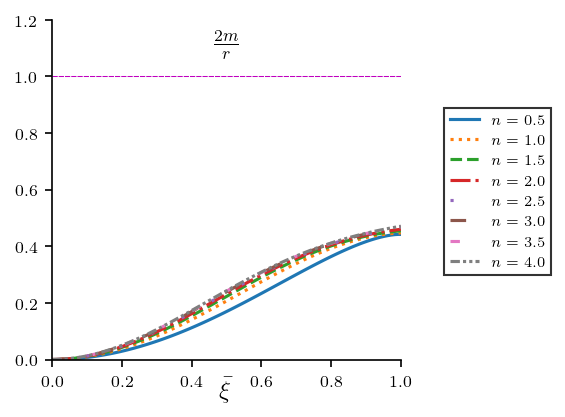

In [7]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):

    ax1.plot(ListaModelos[i][0],ListaModelos[i][1],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.2)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{2m}{r}$', x=0.5,y=0.85,fontsize=12)
ax1.legend(ncol=1, loc=(1.125,0.25),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

## * Condition C2: $\,\, \rho \geq 0$, $\,\,P \geq 0$, $\,\,P_{\perp} \geq 0$

The dimensionless energy density, radial pressure and tangential pressure are:
\begin{eqnarray}
     \frac{\rho}{\rho_{c}} &=& \Psi^{n}(\xi) \,, \\
     \frac{P}{P_{c}} &=& \frac{\Upsilon \left(\Psi^{n+1} - \varkappa^{1 + \frac{1}{n}} \right) + \alpha \left(\Psi^{n} - \varkappa \right)}{\sigma} = \frac{\mathcal{P}}{\sigma} \qquad \textrm{and} \\
     \frac{P_{\perp}}{P_{c}} &=& \frac{1}{\sigma} \left\{\frac{C \Upsilon (n+1) \left(\eta + \xi^{3} \mathcal{P} \right) \left(\Psi^{n} + \mathcal{P} \right)}{\xi - 2 \Upsilon (n+1) \eta} + \mathcal{P} \right\} \,,
\end{eqnarray}
respectively.

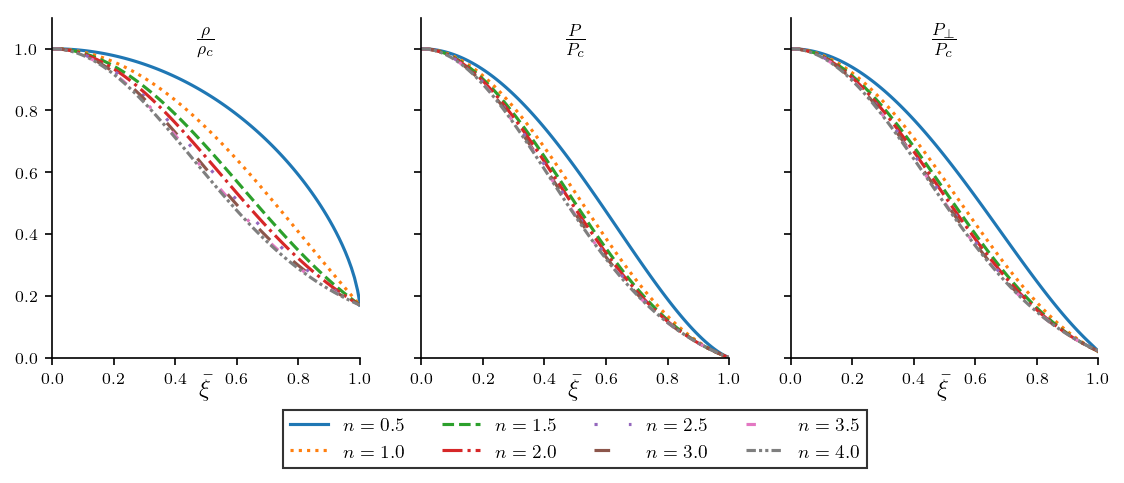

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(9,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][2][0],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    ax2.plot(ListaModelos[i][0],ListaModelos[i][2][1],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    ax3.plot(ListaModelos[i][0],ListaModelos[i][2][2],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax2.set_xbound(0.0,1.0)
ax3.set_xbound(0.0,1.0)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax2.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax3.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax3.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\rho}{\rho_{c}}$', x=0.5,y=0.85,fontsize=12)
ax2.set_title(r'$\frac{P}{P_{c}}$', x=0.5,y=0.85,fontsize=12)
ax3.set_title(r'$\frac{P_{\perp}}{P_{c}}$', x=0.5,y=0.85,fontsize=12)
ax1.legend(ncol=4,loc=(0.75,-0.325),edgecolor='k',fancybox=False,fontsize=9)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')

plt.show()

## * Condition C3: $\,\, \rho^{\prime} \leq 0$, $\,\,P^{\prime} \leq 0$, $\,\,P^{\prime}_{\perp} \leq 0$

The dimensionless gradients of energy density, radial pressure and tangential pressure are:
\begin{eqnarray}
    \frac{\dot{\rho}}{\rho_{c}} &=& n \Psi^{n-1} \dot{\Psi} \,, \\
    \frac{\dot{P}}{P_{c}} &=& \frac{\dot{\mathcal{P}}}{\sigma} = \frac{\Psi^{n-1} \left\{\Upsilon (n+1) \Psi + \alpha n                                                                                                                                                                                                                                                                                                                              \right\} \dot{\Psi}}{\sigma}    \qquad \textrm{and} \\
    \frac{\dot{P}_{\perp}}{P_{c}} &=& \frac{C \Upsilon (n+1)}{\sigma\left\{\xi - 2 \Upsilon (n+1) \eta\right\}} \Bigg\{\left(n \Psi^{n-1} \dot{\Psi} + \dot{\mathcal{P}} \right) \left(\eta + \xi^{3} \mathcal{P} \right) +  \left(\Psi^{n} + \mathcal{P} \right) \left(\dot{\eta} + 3 \xi^{2} \mathcal{P} + \xi^{3} \dot{\mathcal{P}} \right) \nonumber - \; \frac{ \left(\Psi^{n} + \mathcal{P} \right) \left(\eta + \xi^{3} \mathcal{P} \right) \left\{1 - 2 \Upsilon (n+1) \dot{\eta} \right\}}{\left\{\xi - 2 \Upsilon (n+1) \eta \right\}^{2}} \Bigg\} + \frac{\dot{\mathcal{P}}}{\sigma} 
\end{eqnarray}
respectively.

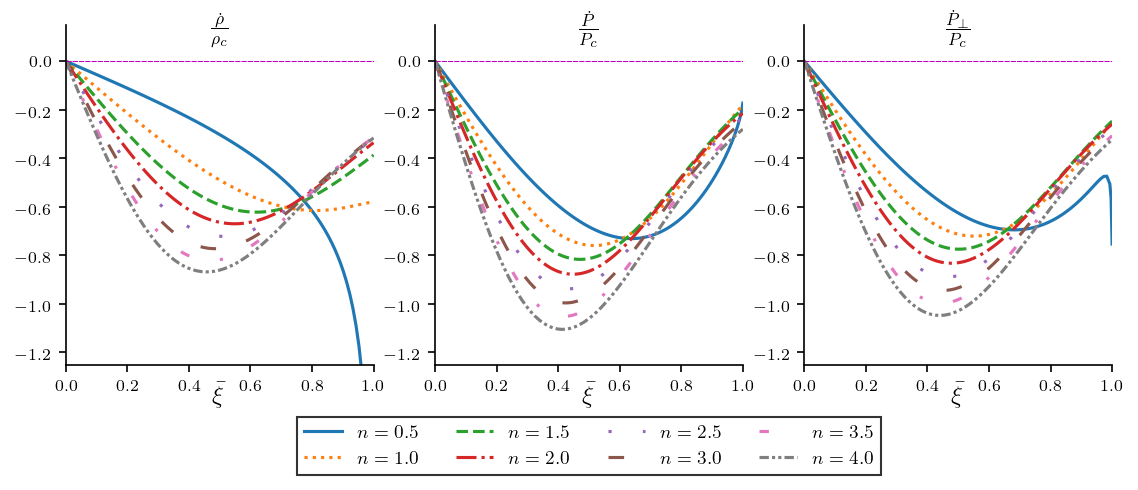

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize=(9,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][3][0],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    ax2.plot(ListaModelos[i][0],ListaModelos[i][3][1],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    ax3.plot(ListaModelos[i][0],ListaModelos[i][3][2],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-1.25,0.15)
ax2.set_xbound(0.0,1.0)
ax2.set_ybound(-1.25,0.15)
ax3.set_xbound(0.0,1.0)
ax3.set_ybound(-1.25,0.15)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax2.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax3.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax3.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\dot{\rho}}{\rho_{c}}$', x=0.5,y=0.9,fontsize=12)
ax2.set_title(r'$\frac{\dot{P}}{P_{c}}$', x=0.5,y=0.9,fontsize=12)
ax3.set_title(r'$\frac{\dot{P}_{\perp}}{P_{c}}$', x=0.5,y=0.9,fontsize=12)
ax1.legend(ncol=4,loc=(0.75,-0.325),edgecolor='k',fancybox=False,fontsize=9)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax1.axhline(y=0.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
ax2.axhline(y=0.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
ax3.axhline(y=0.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

## * Condition C4: $\,\, \rho - P - 2 P_{\perp} \geq 0$

The condition on the trace of the energy-momentum tensor is
\begin{equation}
    \Psi^{n} - 3 \mathcal{P} - \frac{2 C \Upsilon (n+1) \left(\eta + \xi^{3} \mathcal{P} \right) \left(\Psi^{n} + \mathcal{P} \right)}{\xi - 2 \Upsilon (n+1) \eta} 
\end{equation}

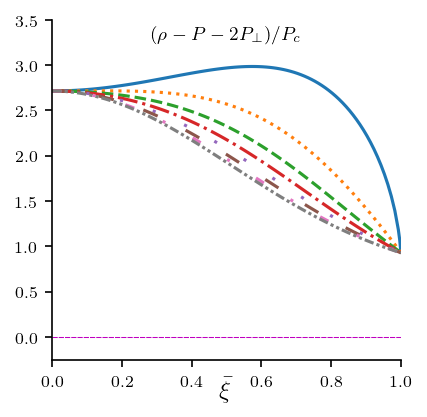

In [10]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][4],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-0.25,3.5)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$(\rho - P - 2P_{\perp})/P_{c}$', x=0.5,y=0.9,fontsize=9)
# ax1.legend(ncol=1, loc=(1.125,0.25),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

## * Condition C5: $\,\, 0 < v_{s}^{2} \leq 1 \,\, $ and $\,\,0 < v_{s \perp}^{2} \leq 1$

The dimensionless radial and tangential speeds of sound are
\begin{eqnarray}
    v^{2}_{s} &=& \Upsilon \left(\frac{n+1}{n} \right) \Psi + \alpha \qquad \textrm{and} \\
    v^{2}_{s \perp} &=& \frac{C \Upsilon \left(n+1\right)}{\xi-2\Upsilon\left(n+1\right)\eta} \left\{ \left(1+v^{2}_{s}  \right) \left(\eta + \xi^{3}\mathcal{P} \right)  + \xi^{2}\Psi \left(\Psi^{n} + \mathcal{P}\right) \left( \frac{\Psi^{n} + 3 \mathcal{P}}{n \Psi^{n} \dot{\Psi}} + \frac{v^{2}_{s} \xi}{\Psi} \right) - \frac{\Psi \left(\Psi^{n} + \mathcal{P}\right)\left(\eta+\xi^{3}\mathcal{P}\right) \left\{1-2\Upsilon\left(n+1\right)\xi^{2}\Psi^{n}\right\}}{n \Psi^{n} \dot{\Psi} \left\{\xi -2\Upsilon \left(n+1\right)\eta \right\}} \right\} + v^{2}_{s} \,,
\end{eqnarray}
respectively.

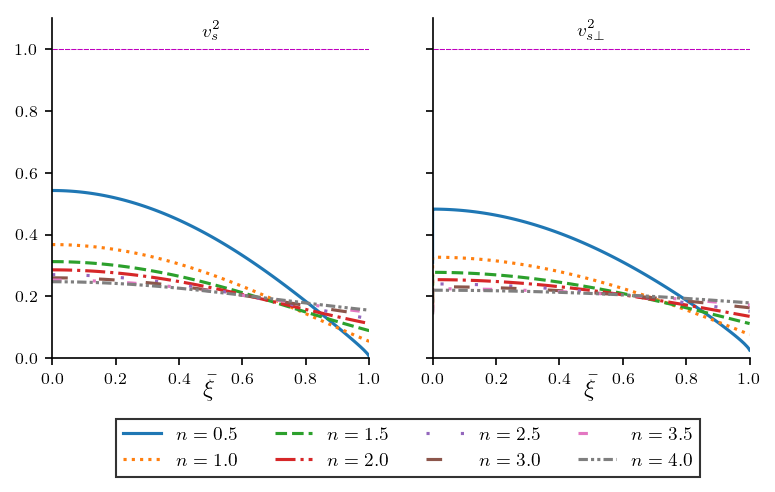

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][5][0],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    ax2.plot(ListaModelos[i][0],ListaModelos[i][5][1],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax2.set_xbound(0.0,1.0)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax2.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$v^{2}_{s}$', x=0.5,y=0.9,fontsize=9)
ax2.set_title(r'$v^{2}_{s \perp}$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=4, loc=(0.2,-0.35),edgecolor='k',fancybox=False,fontsize=9)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax1.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
ax2.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

## * Condition C6: $\,\, \Gamma \leq \frac{4}{3}$

The adiabatic index is
\begin{equation}
    \Gamma = \frac{\rho + P}{P} v^{2}_{s} \equiv \frac{\Psi^{n} + \mathcal{P}}{\mathcal{P}} \left\{\Upsilon \left(\frac{n+1}{n} \right) \Psi + \alpha \right\}
\end{equation}

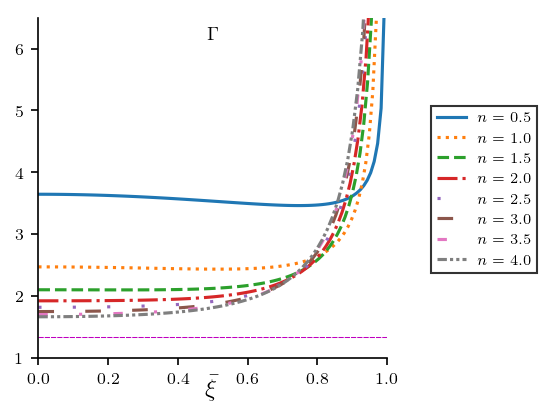

In [12]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][6],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(1.0,6.5)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\Gamma$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=1, loc=(1.125,0.25),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=4/3,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

## * Condition C7: $\,\, \frac{\mathrm{d}M(\rho_{c})}{\mathrm{d}\rho_{c}} > 0$

This condition requires the variation of the $\sigma$ parameter, therefore it has been done separately in **Master polytrope - C7**.

## * Condition C8: Sign change in the perturbed equilibrium equation

The perturbed equilibrium equation is given by
\begin{equation}
    \frac{\delta \mathcal{R}}{\delta \rho} = \underbrace{\frac{h \left(m + 4 \pi r^{3} P \right)}{r(r-2m)}}_{\mathcal{R}_{1}}  + \underbrace{\frac{h \left(\rho + P \right) \left(1 + 8 \pi P r^{2} \right)}{\left(r - 2m \right)^{2}} \, \frac{4 \pi r^{2} \rho}{\rho^{\prime}}}_{\mathcal{R}_{2}} + \underbrace{\frac{h \left\{m + 4 \pi r^{3} \left(\rho + 2 P \right) \right\}}{r(r-2m)} v^{2}}_{\mathcal{R}_{3}}  + \underbrace{\left\{\left(v^{2} \right)^{\prime} + v^{2} \frac{\rho^{\prime \prime}}{\rho^{\prime}} \right\}}_{\mathcal{R}_{4}} \,,
\end{equation}
where
\begin{equation}
    \mathcal{R} = \frac{\mathrm{d}P}{\mathrm{d}r} + h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} = 0 \,.
\end{equation}

Therefore, the dimensionless perturbed hydrostatic equilibrium equation is
\begin{eqnarray}
a \frac{\delta \mathcal{R}}{\delta \rho} &\equiv& \frac{h \Upsilon (n+1) \left( \eta + \xi^{3} \mathcal{P} \right)}{\xi \left\{\xi - 2 \Upsilon (n+1) \eta \right\}} + \frac{h \Upsilon (n+1) \xi^{2} \Psi \left(\Psi^{n} + \mathcal{P} \right) \left\{1 + 2 \Upsilon (n+1) \xi^{2} \mathcal{P} \right\}}{n \dot{\Psi} \left\{\xi - 2 \Upsilon (n+1) \eta \right\}^{2}} \nonumber \\
    && + \frac{h \Upsilon (n+1) \left(\eta + \xi^{3} \Psi^{n} + 2 \xi^{3} \mathcal{P}  \right) \left\{\Upsilon (n+1) \Psi + \alpha n \right\}}{n \xi \left\{\xi - 2 \Upsilon (n+1) \eta \right\}} + \frac{\Upsilon (n+1) \left\{n \left(\dot{\Psi} \right)^{2} + \Psi \ddot{\Psi} \right\}}{n \dot{\Psi}} + \frac{\alpha \left\{(n-1) \left(\dot{\Psi} \right)^{2} + \Psi \ddot{\Psi} \right\}}{\Psi \dot{\Psi}}                = \bar{\mathcal{R}}
\end{eqnarray}


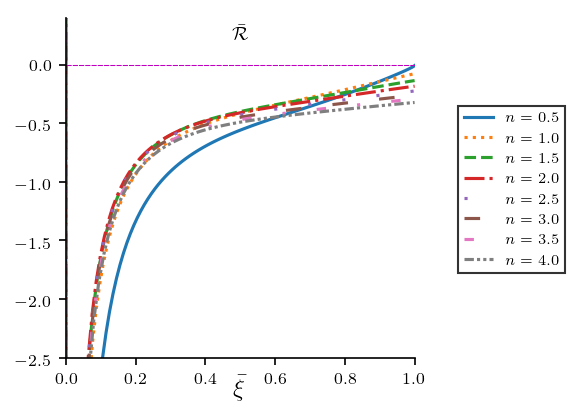

In [13]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][8],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-2.5,0.4)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\bar{\mathcal{R}}$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=1, loc=(1.125,0.25),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

## * Condition C9: $\,\, \rho^{\prime \prime} \leq 0$

The second derivative of dimensionless energy density is
\begin{equation}
    \ddot{\left(\Psi^{n}\right)} = n \left\{ \left(n-1 \right) \Psi^{n-2} \left(\dot{\Psi} \right)^{2} + \Psi^{n-1} \ddot{\Psi} \right\}
\end{equation}

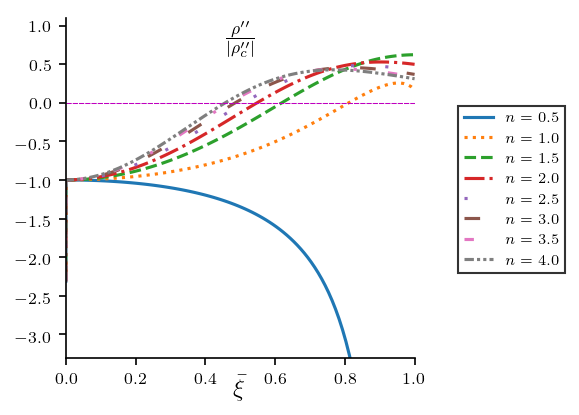

In [14]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][9]/abs(ListaModelos[i][9][1]),linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-3.3,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\rho^{\prime \prime}}{|\rho^{\prime \prime}_{c}|}$', x=0.5,y=0.85,fontsize=12)
ax1.legend(ncol=1, loc=(1.125,0.25),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()